https://www.labri.fr/perso/nrougier/from-python-to-numpy/

### Memory layout

An instance of class ndarray consists of a contiguous one-dimensional segment of computer memory (owned by the array, or by some other object), combined with an indexing scheme that maps N integers into the location of an item in the block.

In [2]:
import numpy as np

In [30]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('number of bytes:', a.nbytes)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)

In [3]:
Z = np.arange(9).reshape(3,3).astype(np.int16)

In [4]:
strides = Z.shape[1]*Z.itemsize, Z.itemsize

With all these information, we know how to access a specific item (designed by an index tuple) and more precisely, how to compute the start and end offsets:

In [9]:
print(Z[index].tobytes())

b'\x04\x00'


In [10]:
offset = 0

In [13]:
for i in range(Z.ndim):
    offset += Z.strides[i]*index[i]
print(Z.tobytes()[offset_start:offset_end])

b'\x04\x00'


In [16]:
type(type)

type

In [17]:
Z

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int16)

In [18]:
Z.ndim

2

If we now take a slice of Z, the result is a view of the base array Z:

In [21]:
V = Z[::2,::2]

Such view is specified using a shape, a dtype and strides because strides cannot be deduced anymore from the dtype and shape only:V

In [25]:
V

array([[0, 2],
       [6, 8]], dtype=int16)

In [31]:
print_info(V)

number of elements: 4
number of dimensions: 2
number of bytes: 8
shape: (2, 2)
data type: int16
strides: (12, 4)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [7]:
index=1,1

In [36]:
# to check if it is view or copy
V.base is Z

True

In [38]:
Z1 = np.zeros(9)
# index = [0,1,2]
# Z[index] = 1

Z_copy = Z[[0,1,2]]
Z_copy[...] = 1

In [40]:
# to check if it is view or copy
Z_copy.base is Z

False

#####  Note that some numpy functions return a view when possible (e.g. ravel) while some others always return a copy (e.g. flatten):

In [47]:
np.empty(shape=(3,3),order='F').strides

(8, 24)

In [48]:
Z_copy

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int16)

In [53]:
dir(Z_copy)

TypeError: 'NoneType' object is not subscriptable

In [55]:
Z = np.ones(4*1_000_000, np.float32)

In [56]:
timeit("Z.view(np.float16)[...] = 0", globals())

55.5 ns ± 1.92 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [59]:
timeit("Z.view(np.int16)[...]=0",globals())

53.4 ns ± 1.04 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [60]:
timeit("Z.view(np.int32)[...] = 0", globals())

53 ns ± 0.956 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [63]:
timeit("Z.view(np.int8)[...] = 0", globals())

53.3 ns ± 1.44 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [66]:
del Z

In [72]:
z=np.arange(9).reshape(3,3).astype(np.int16)
z

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int16)

b'\x04\x00'

In [87]:
index=1,1

print(z[index].tobytes())

b'\x04\x00'


In [88]:
offset_start=0
for i in range(z.ndim):
    offset_start+=z.strides[i]*index[i]
#     print(offset)
offset_end = offset_start + z.itemsize

In [82]:
print(z.tobytes()[offset_start:offset_end])

b'\x04\x00'


In [93]:
z.data

In [91]:
v=z[::2,::2]
v,v.strides

(array([[0, 2],
        [6, 8]], dtype=int16), (12, 4))

### Temporary copy

In [106]:
x = np.ones(100_000_000,dtype=np.int)
y = np.ones(100_000_000,dtype=np.int)
a = 2*x+2*y
a

array([4, 4, 4, ..., 4, 4, 4])

In [104]:
timeit("2*x+2*y",globals())

53.5 ns ± 0.0945 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [105]:
np.multiply(x,2,out=x)
np.multiply(y,2,out=y)
np.add(x,y,out=x)
x

array([4, 4, 4, ..., 4, 4, 4])

In [107]:
timeit("np.add(x,y,out=x)",globals())

56.9 ns ± 1.04 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Excercise

Given two vectors Z1 and Z2. We would like to know if Z2 is a view of Z1 and if yes, what is this view ?

In [161]:
z1 = np.arange(10)
z2=z1[1:-1:2]

In [162]:
z2.base is z1

True

In [163]:
# we need to find start, stop and stride of z2 to represent Z1

In [164]:
z1,z2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1, 3, 5, 7]))

In [165]:
#1 Step
step = z2.strides[0] // z1.strides[0]
step

2

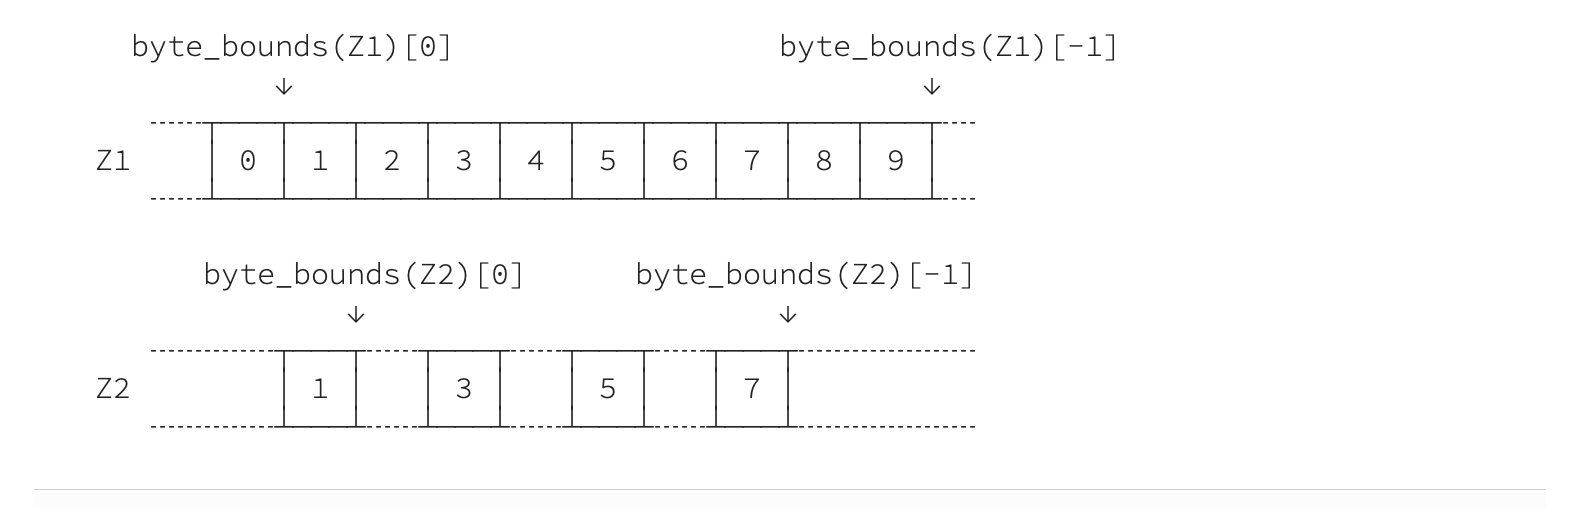

In [166]:
#2. Offset start and end
start = np.byte_bounds(z2)[0]-np.byte_bounds(z1)[0]
stop = np.byte_bounds(z2)[-1]-np.byte_bounds(z1)[-1]

In [167]:
start,stop

(8, -16)

In [168]:
start = start // z1.itemsize
start

1

In [169]:
stop=z1.size + stop // z1.itemsize
stop

8

In [170]:
print(start, stop, step)

1 8 2


In [171]:
#Final Answer
z1[start:stop:step]

array([1, 3, 5, 7])

#### Practice Excerice 

In [198]:
a = np.arange(25).astype(np.int64)
b=a[2:-2:3]

In [199]:
a,b

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]), array([ 2,  5,  8, 11, 14, 17, 20]))

In [200]:
#Need to find start, stop and step

In [201]:
step = b.strides[0] // a.strides[0]
step

3

In [202]:
start = (np.byte_bounds(b)[0]-np.byte_bounds(a)[0])//a.itemsize
start

2

In [203]:
end = a.size +((np.byte_bounds(b)[-1]-np.byte_bounds(a)[-1])//a.itemsize)
end

21

In [204]:
#final
a[start:end:step]

array([ 2,  5,  8, 11, 14, 17, 20])